In [4]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys

from ROOT import TFile, TTree
from array import array


def Landau(x,a, MP,xi):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    return  C1 * C3

def Landgauss(x,a, MP, xi, b,eps):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    C4 = C1 * C3
    C5 = b * np.exp(-x/eps)
    return  C4 + C5

In [2]:
## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [3]:
path_all = 'dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_141_SIZE_250x529__NSIGMAS_5_KeV.pkl'
# path_all = 'dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_141_SIZE_100x529__NSIGMAS_3_KeV.pkl'


histogram_all = open(path_all, 'rb')
data_histogram_all = pck.load(histogram_all)
histogram_all.close()

nsig = path_all.split('_')[14]
# print(nsig)

ModuleNotFoundError: No module named 'numpy._core'

In [84]:
#### Visualizar las keys del diccionario ####
print('Las unidades de los datos están en: ', data_histogram_all['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram_all.keys())
print('Llaves secuandarias por extensión: ', data_histogram_all['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))

Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_clusters_detected', 'Energy_Units', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge'])


In [85]:
data_all_extension_1 = data_histogram_all['extension_1']
data_all_extension_2 = data_histogram_all['extension_2']
data_all_extension_4 = data_histogram_all['extension_4'
                                        ]
print(data_all_extension_1.keys())

dict_keys(['charge'])


In [86]:
n_muons = data_histogram_all['All_clusters_detected']
print('Se detectaron ', n_muons, ' clusters (contando las 3 extensiones)')

Se detectaron  422705  clusters (contando las 3 extensiones)


## Espectro de Energía

### Todos los clusters

50


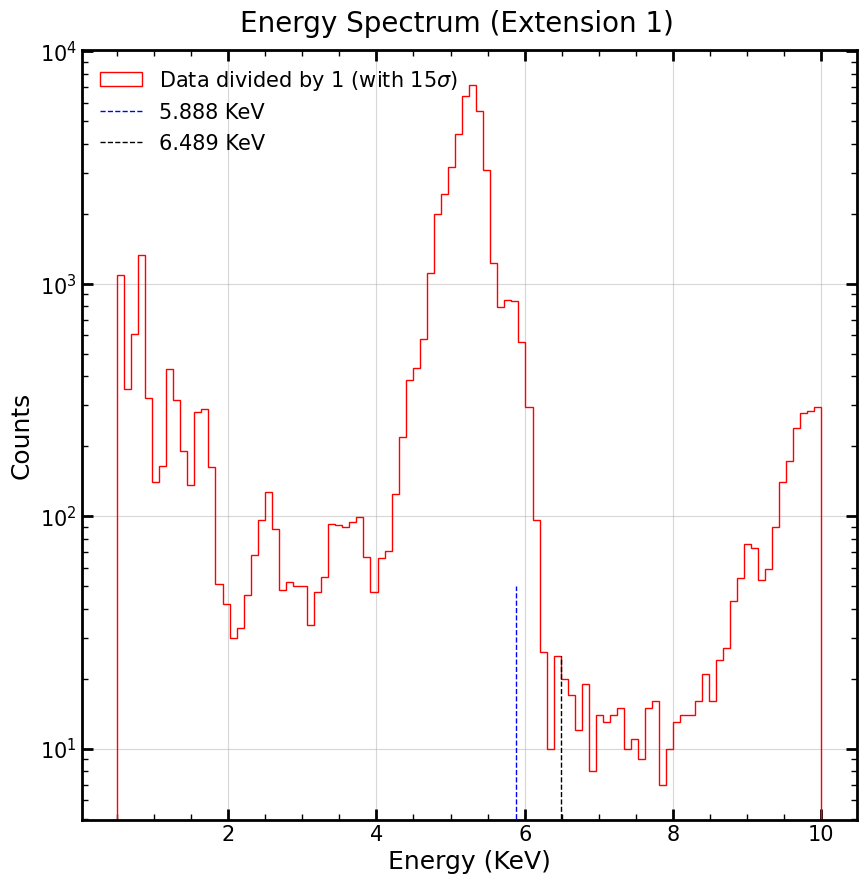

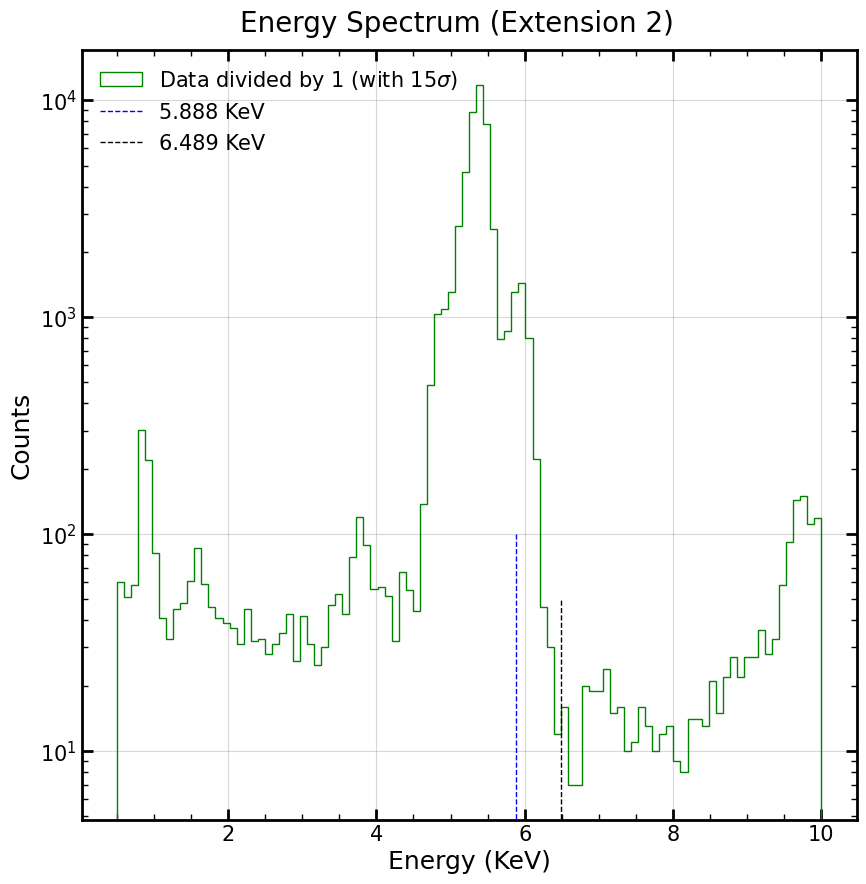

/tmp/ipykernel_4475/3898023479.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


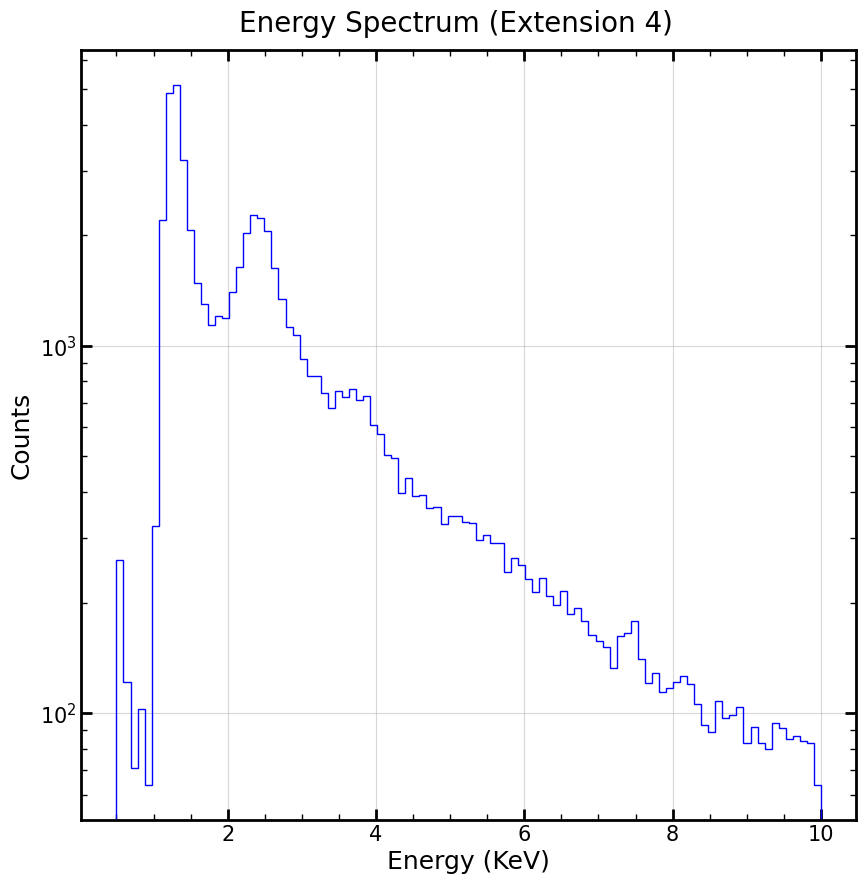

In [ ]:
BINS = 100
plot_range = (0.5, 10)

### ======== Re-scale data ======== ###
charge_ext1 = []
charge_ext2 = []
charge_ext4 = []
rescale = 1

for charge in data_all_extension_1['charge']:
    ncharge = charge/rescale
    charge_ext1.append(ncharge)

for charge in data_all_extension_2['charge']:
    ncharge = charge/rescale
    charge_ext2.append(ncharge)

for charge in data_all_extension_4['charge']:
    ncharge = charge/rescale
    charge_ext4.append(ncharge)
### ================================ ###

############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(charge_ext1, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

hist, bins_edges = np.histogram(charge_ext1, bins=BINS, range = (plot_range[0], plot_range[1]))
maxval = np.argmax(hist)


const = 1
axs.vlines(x=5.888*const, ymin=0, ymax=maxval, linestyles= 'dashed', colors='b', label='5.888 KeV')
axs.vlines(x=6.489*const, ymin=0, ymax=maxval/2, linestyles= 'dashed', colors='k', label='6.489 KeV')

axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 1)', size = 20, y=0.92)
axs.grid()
plt.show()

############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext2 , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'g',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

axs.vlines(x=5.888*const, ymin=0, ymax=100, linestyles= 'dashed', colors='b', label='5.888 KeV')
axs.vlines(x=6.489*const, ymin=0, ymax=50, linestyles= 'dashed', colors='k', label='6.489 KeV')


axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 2)', size = 20, y=0.92)
axs.grid()
plt.show()



############################################ ----- EXTENSION 4 ----- ###################################
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext4, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
# axs.set_ylim(0,2000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 4)', size = 20, y=0.92)
axs.grid()
plt.show()


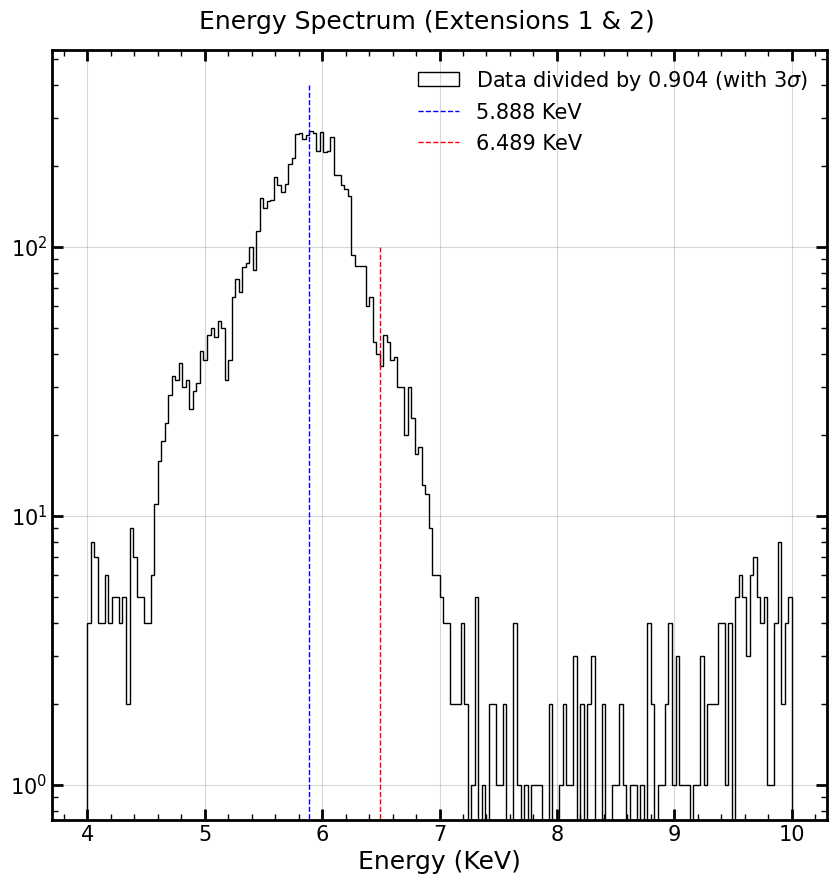

In [71]:
data_ext_1_2_all = charge_ext1 + charge_ext2

Bins = 200
max_energy = 10
min_energy = 4
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_ext_1_2_all, bins = Bins, range = [min_energy, max_energy], color = 'k', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)',  histtype = 'step')

const = 1
axs.vlines(x=5.888*const, ymin=0, ymax=400, linestyles= 'dashed', label=str(5.888*const) + ' KeV', colors='b')
axs.vlines(x=6.489*const, ymin=0, ymax=100, linestyles= 'dashed', label=str(6.489*const) + ' KeV', colors='r')

axs.legend()
axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
axs.grid()
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum (Extensions 1 & 2)', size = 18, y=0.92)
plt.show()

In [55]:
hist, bins_edges = np.histogram(data_ext_1_2_all, bins=150, range = (5.8, 7))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  5.92  KeV


## Espectro de Fluorescencia

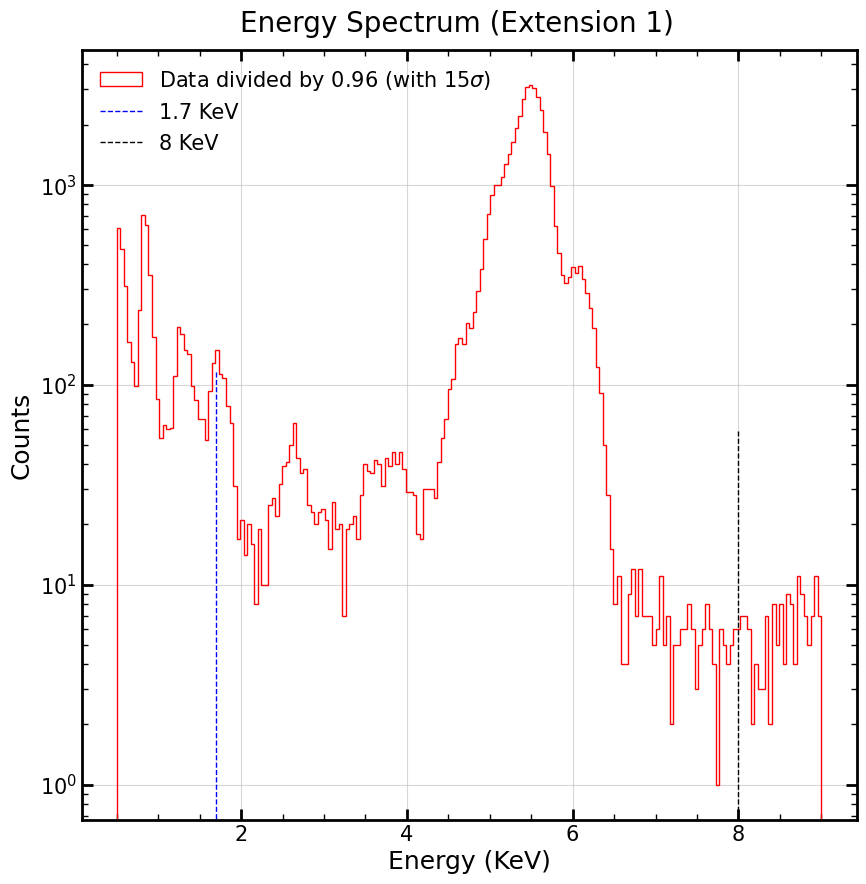

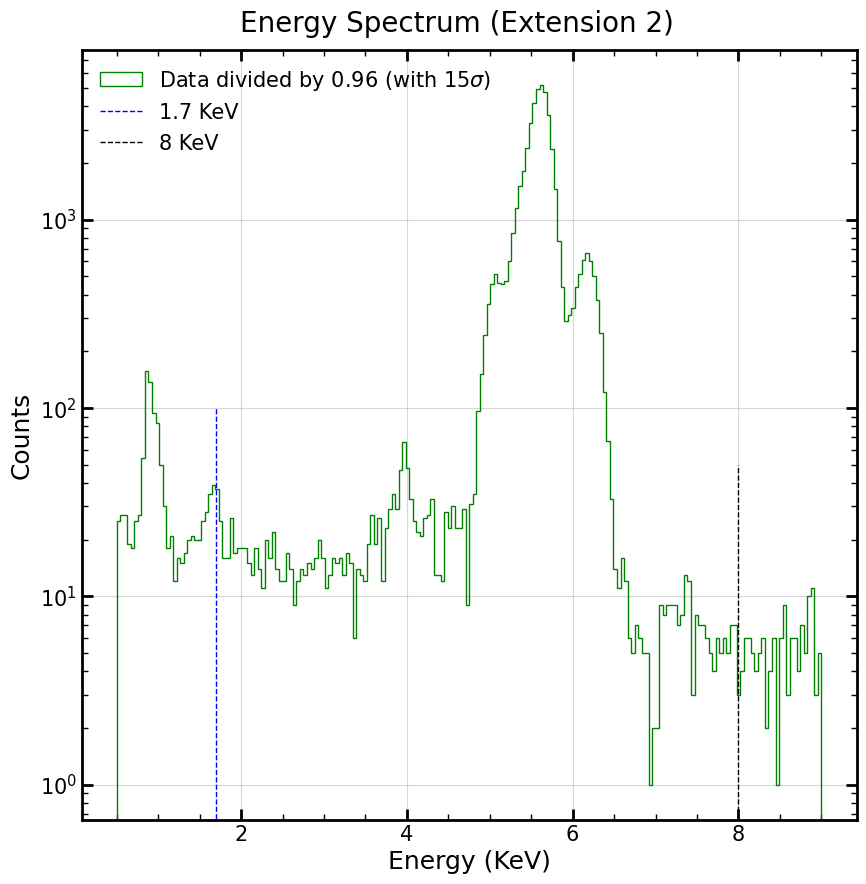

/tmp/ipykernel_4475/3751968178.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


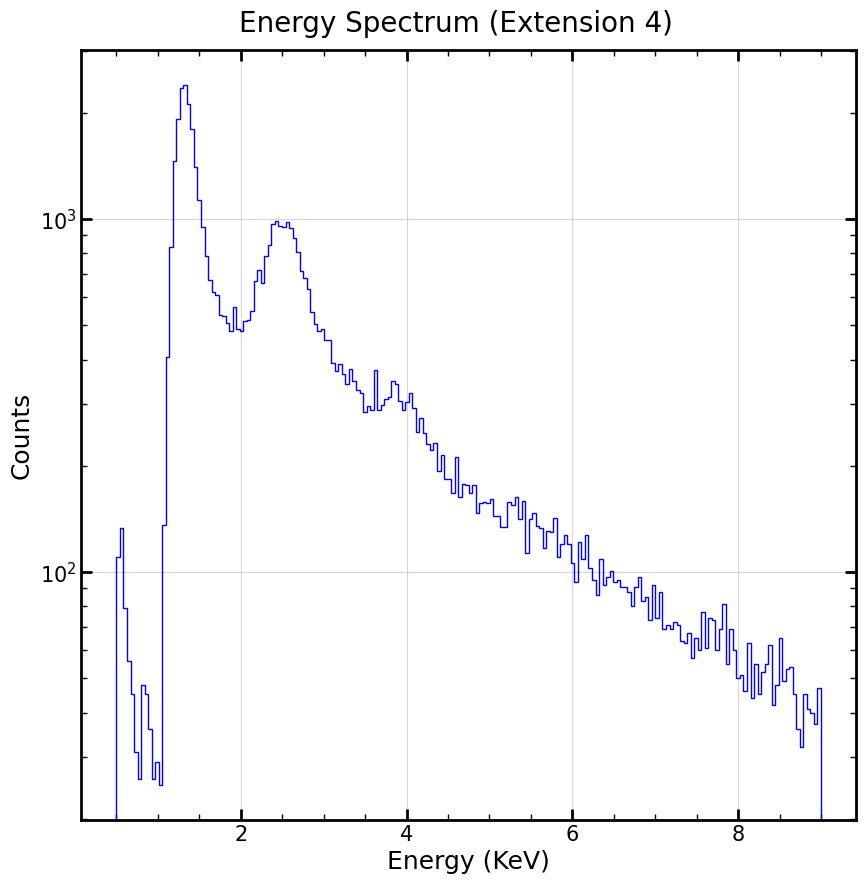

In [95]:
BINS = 200
plot_range = (0.5, 9)

### ======== Re-scale data ======== ###
charge_ext1 = []
charge_ext2 = []
charge_ext4 = []
rescale = 0.96

for charge in data_all_extension_1['charge']:
    ncharge = charge/rescale
    charge_ext1.append(ncharge)

for charge in data_all_extension_2['charge']:
    ncharge = charge/rescale
    charge_ext2.append(ncharge)

for charge in data_all_extension_4['charge']:
    ncharge = charge/rescale
    charge_ext4.append(ncharge)
### ================================ ###

############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(charge_ext1, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

hist, bins_edges = np.histogram(charge_ext1, bins=BINS, range = (plot_range[0], plot_range[1]))
maxval = np.argmax(hist)


const = 1
axs.vlines(x=1.7*const, ymin=0, ymax=maxval, linestyles= 'dashed', colors='b', label='1.7 KeV')
axs.vlines(x=8*const, ymin=0, ymax=maxval/2, linestyles= 'dashed', colors='k', label='8 KeV')

axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 1)', size = 20, y=0.92)
axs.grid()
plt.show()

############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext2 , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'g',  histtype = 'step', label='Data divided by ' + str(rescale)+ ' (with '+ str(nsig)+r'$\sigma$)' )

axs.vlines(x=1.7*const, ymin=0, ymax=100, linestyles= 'dashed', colors='b', label='1.7 KeV')
axs.vlines(x=8*const, ymin=0, ymax=50, linestyles= 'dashed', colors='k', label='8 KeV')


axs.legend(loc = 'upper left')

## EScala Normal
# axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 2)', size = 20, y=0.92)
axs.grid()
plt.show()



############################################ ----- EXTENSION 4 ----- ###################################
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(charge_ext4, bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
# axs.set_ylim(0,2000)

## Escala Log
axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum (Extension 4)', size = 20, y=0.92)
axs.grid()
plt.show()
